<a href="https://colab.research.google.com/github/Annmodels/lstm/blob/master/LSTM_Stk_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
from google.colab import files
train = files.upload()
test = files.upload()

In [0]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
train_set = dataset_train.iloc[:,1:2].values
sc = MinMaxScaler(feature_range = (0,1))
scaled_train = sc.fit_transform(train_set)
scaled_train.shape

(1258, 1)

In [0]:
xtrain = []
ytrain = []
timesteps = 60
for i in range(timesteps,scaled_train.shape[0]):
  xtrain.append(scaled_train[i-timesteps:i,0])
  ytrain.append(scaled_train[i,0])

xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0] , xtrain.shape[1] , 1))
xtrain.shape
#ytrain.shape

(1198, 60, 1)

In [0]:
regressor = Sequential()

regressor.add( LSTM( units = 50 , return_sequences = True , input_shape = (xtrain.shape[1], 1 )))
regressor.add(Dropout( 0.2 ))

regressor.add( LSTM ( units = 50 , return_sequences = True ))
regressor.add(Dropout( 0.2 ))

regressor.add( LSTM ( units = 50 , return_sequences = True ))
regressor.add(Dropout( 0.2 ))

regressor.add( LSTM ( units = 50 ))
regressor.add( Dropout( 0.2 ))

regressor.add( Dense( units = 1 ))

regressor.compile( optimizer = 'adam' , loss = 'mean_squared_error' )

regressor.fit( xtrain , ytrain , epochs = 100 , batch_size = 120 )

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.1421
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0260
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0141
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0090
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0066
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0057
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0056
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0052
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

In [0]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat(( dataset_train['Open'] , dataset_test['Open']) , axis = 0 )
inputs = dataset_total[ len( dataset_total )  - len( dataset_test ) - 60 :].values
inputs = inputs.reshape( -1 , 1 )
inputs = sc.transform( inputs )
xtest = []
for i in range( 60 , 80 ):
  xtest.append( inputs[ i - 60 : i, 0])

xtest = np.array( xtest )
xtest = np.reshape( xtest , ( xtest.shape[0] , xtest.shape[1] , 1 ))

predicted_stock_price = regressor.predict( xtest )
predicted_stock_price = sc.inverse_transform( predicted_stock_price )

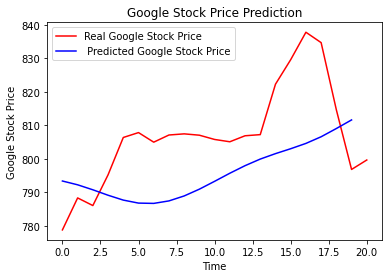

In [0]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price' )
plt.plot( predicted_stock_price , color = 'blue' , label = ' Predicted Google Stock Price' )
plt.title ('Google Stock Price Prediction' )
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()